In [17]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error
import datetime
import time

In [4]:
# !pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/24/ec/ad387100fa3cc2b9b81af0829b5ecfe75ec5bb19dd7c19d4fea06fb81802/xgboost-2.0.3-py3-none-win_amd64.whl.metadata
  Using cached xgboost-2.0.3-py3-none-win_amd64.whl.metadata (2.0 kB)
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/99.8 MB 1.7 MB/s eta 0:01:01
   ---------------------------------------- 0.1/99.8 MB 1.6 MB/s eta 0:01:02
   ---------------------------------------- 0.2/99.8 MB 1.5 MB/s eta 0:01:08
   ---------------------------------------- 0.2/99.8 MB 1.7 MB/s eta 0:01:00
   ---------------------------------------- 0.3/99.8 MB 1.4 MB/s eta 0:01:09
   ---------------------------------------- 0.4/99.8 MB 1.5 MB/s eta 0:01:07
   ---------------------------------------- 0.5/99.8 MB 1.5 MB/s eta 0:01:08
   ---------------------------------------- 0.5/99.8 MB 1.4 MB/s eta 0:01:13
   ------------------------------------

In [18]:
df_train=pd.read_csv("train_ansambly.csv")
df_test=pd.read_csv("test_ansambly.csv")
y_train=df_train["price"]
x_train=df_train.drop(columns=["price","id"])
x_test=df_test.drop(columns="id")

In [19]:
x_train

,date,street_id,build_tech,floor,area,rooms,balcon,metro_dist,g_lift,n_photos,...,kw4,kw5,kw6,kw7,kw8,kw9,kw10,kw11,kw12,kw13
0,2011-1,560,NaN,2,59,3,0,30.0,1.0,5,...,0,0,0,0,0,0,0,0,0,0
1,2011-1,667,NaN,10,50,2,1,25.0,NaN,1,...,0,0,0,0,0,0,0,0,0,0
2,2011-1,90,0.0,1,48,2,0,25.0,0.0,1,...,0,0,0,0,0,0,0,0,0,0
3,2011-1,94,1.0,3,62,3,1,30.0,NaN,3,...,0,0,0,0,0,0,0,0,0,0
4,2011-1,232,0.0,3,60,3,0,25.0,NaN,3,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2012-3,401,0.0,5,30,1,0,30.0,NaN,1,...,0,0,0,0,0,0,0,0,0,0
99996,2012-3,59,0.0,4,34,1,0,30.0,NaN,1,...,0,0,0,0,0,0,0,0,0,0
99997,2012-3,253,NaN,3,52,2,0,5.0,NaN,4,...,0,0,0,0,0,0,0,0,0,0
99998,2012-3,305,1.0,3,181,5,1,5.0,NaN,3,...,0,0,0,0,0,0,0,0,0,0


## Трансформируем столбец 'date' с помощью import datatime в численный тип данных


In [20]:

x_train['date'] = pd.to_datetime(x_train['date'])
x_test['date'] = pd.to_datetime(x_test['date'])

x_train['date'] = x_train['date'].apply(lambda x: int(x.timestamp())/10**4)
x_test['date'] = x_test['date'].apply(lambda x: int(x.timestamp())/10**4)

In [21]:
x_train

,date,street_id,build_tech,floor,area,rooms,balcon,metro_dist,g_lift,n_photos,...,kw4,kw5,kw6,kw7,kw8,kw9,kw10,kw11,kw12,kw13
0,129384.0,560,NaN,2,59,3,0,30.0,1.0,5,...,0,0,0,0,0,0,0,0,0,0
1,129384.0,667,NaN,10,50,2,1,25.0,NaN,1,...,0,0,0,0,0,0,0,0,0,0
2,129384.0,90,0.0,1,48,2,0,25.0,0.0,1,...,0,0,0,0,0,0,0,0,0,0
3,129384.0,94,1.0,3,62,3,1,30.0,NaN,3,...,0,0,0,0,0,0,0,0,0,0
4,129384.0,232,0.0,3,60,3,0,25.0,NaN,3,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,133056.0,401,0.0,5,30,1,0,30.0,NaN,1,...,0,0,0,0,0,0,0,0,0,0
99996,133056.0,59,0.0,4,34,1,0,30.0,NaN,1,...,0,0,0,0,0,0,0,0,0,0
99997,133056.0,253,NaN,3,52,2,0,5.0,NaN,4,...,0,0,0,0,0,0,0,0,0,0
99998,133056.0,305,1.0,3,181,5,1,5.0,NaN,3,...,0,0,0,0,0,0,0,0,0,0


## Строим матрицу корреляции

In [22]:
cor=x_train.corr().round(2)
cor.style.background_gradient(cmap='coolwarm')

,date,street_id,build_tech,floor,area,rooms,balcon,metro_dist,g_lift,n_photos,kw1,kw2,kw3,kw4,kw5,kw6,kw7,kw8,kw9,kw10,kw11,kw12,kw13
date,1.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,0.010000,-0.000000,0.010000,0.000000,-0.000000,-0.000000,-0.010000,0.000000,0.000000,-0.000000,0.000000,0.010000
street_id,-0.000000,1.000000,-0.010000,-0.010000,-0.010000,0.000000,-0.010000,0.010000,-0.010000,0.010000,-0.000000,0.000000,0.000000,0.000000,0.010000,-0.010000,-0.000000,-0.000000,0.010000,-0.000000,0.000000,-0.000000,0.000000
build_tech,-0.000000,-0.010000,1.000000,0.180000,0.320000,0.130000,0.790000,0.020000,0.010000,0.030000,-0.000000,-0.030000,-0.080000,-0.070000,-0.060000,-0.040000,-0.030000,0.070000,0.070000,0.040000,0.010000,0.090000,0.030000
floor,0.000000,-0.010000,0.180000,1.000000,0.150000,-0.000000,0.140000,0.010000,0.000000,0.000000,-0.000000,-0.040000,-0.050000,-0.000000,0.030000,0.010000,0.070000,-0.050000,0.030000,0.010000,0.000000,0.060000,0.000000
area,-0.000000,-0.010000,0.320000,0.150000,1.000000,0.790000,0.260000,0.010000,0.000000,0.170000,-0.000000,-0.060000,-0.040000,-0.020000,-0.010000,0.010000,0.010000,0.000000,-0.000000,0.100000,0.050000,0.020000,0.040000
rooms,0.000000,0.000000,0.130000,-0.000000,0.790000,1.000000,0.100000,0.000000,0.000000,0.210000,0.000000,-0.010000,-0.010000,-0.010000,-0.010000,-0.000000,-0.010000,0.010000,0.010000,0.030000,0.020000,-0.010000,0.010000
balcon,-0.000000,-0.010000,0.790000,0.140000,0.260000,0.100000,1.000000,0.010000,0.010000,0.020000,0.000000,-0.020000,-0.060000,-0.060000,-0.050000,-0.030000,-0.020000,0.050000,0.060000,0.030000,0.010000,0.070000,0.030000
metro_dist,0.000000,0.010000,0.020000,0.010000,0.010000,0.000000,0.010000,1.000000,-0.000000,0.010000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000
g_lift,-0.000000,-0.010000,0.010000,0.000000,0.000000,0.000000,0.010000,-0.000000,1.000000,0.000000,0.000000,-0.010000,-0.010000,-0.010000,-0.000000,-0.010000,-0.000000,-0.000000,-0.000000,0.000000,-0.010000,-0.000000,-0.000000
n_photos,0.000000,0.010000,0.030000,0.000000,0.170000,0.210000,0.020000,0.010000,0.000000,1.000000,0.040000,-0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,0.000000


## Столбец bulid_tech сильно коррелирует с balcon и он имеет много пропусков поэтому рискнем и просто удалим его

In [23]:
x_train=x_train.drop(columns="build_tech")
x_test=x_test.drop(columns="build_tech")

## Смотрим кол-во пропусков и заполняем их

In [24]:
x_train.isna().sum()

date              0
street_id         0
floor             0
area              0
rooms             0
balcon            0
metro_dist     4896
g_lift        29992
n_photos          0
kw1               0
kw2               0
kw3               0
kw4               0
kw5               0
kw6               0
kw7               0
kw8               0
kw9               0
kw10              0
kw11              0
kw12              0
kw13              0
dtype: int64

## Столбцы build_tech, g_lift заменим медианным значением, и после проверки metro_dist (была гипотеза вдруг квартиры находятся не в городе с метро, но оказалось все в порядке) заполним также медианным значением

In [25]:
# x_train['build_tech'].fillna(x_train['build_tech'].median(), inplace=True)
x_train['metro_dist'].fillna(x_train['metro_dist'].median(), inplace=True)
x_train['g_lift'].fillna(x_train['g_lift'].median(), inplace=True)

# x_test['build_tech'].fillna(x_test['build_tech'].median(), inplace=True)
x_test['metro_dist'].fillna(x_test['metro_dist'].median(), inplace=True)
x_test['g_lift'].fillna(x_test['g_lift'].median(), inplace=True)

## Проверяем данные на выбросы и адекватность

In [26]:
for x in x_train.columns:
    print(np.unique(x_train[x], return_counts=True), f'{x} - is column')
    print(x_train[x].min(),x_train[x].max(), f'{x} - is column')

(array([129384.  , 129651.84, 129893.76, 130161.6 , 130420.8 , 130688.64,
       130947.84, 131215.68, 131483.52, 131742.72, 132010.56, 132269.76,
       132537.6 , 132805.44, 133056.  , 134904.96, 135172.8 , 135432.  ]), array([5578, 5546, 5482, 5671, 5568, 5582, 5500, 5546, 5583, 5662, 5652,
       5475, 5588, 5597, 5265, 5603, 5513, 5589], dtype=int64)) date - is column
129384.0 135432.0 date - is column
(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 

## Смотрим распределение y_train

C:\Users\user\AppData\Local\Temp\ipykernel_5544\3002812025.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_train))


<Axes: xlabel='price', ylabel='Density'>

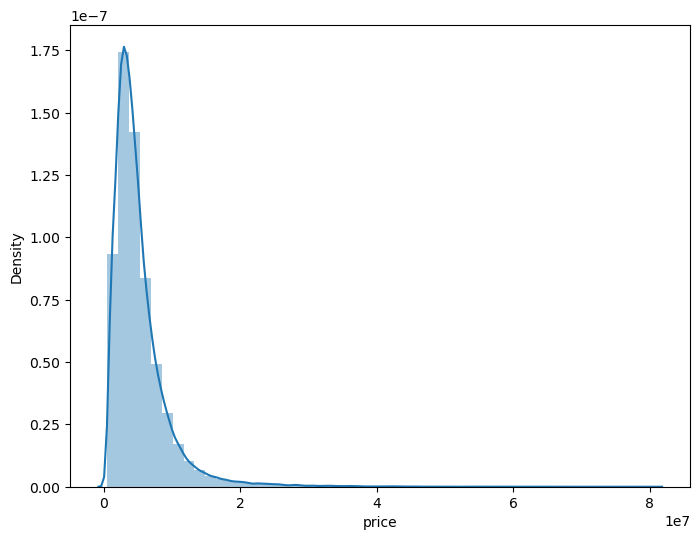

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# гистограмма
f, ax = plt.subplots(figsize=(8, 6))
sns.distplot((y_train))

## Всё адекватно

In [28]:
print(min(y_train))
print(max(y_train))

448000
80548000


In [30]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scale=scaler.fit_transform(x_train)
x_scale_test=scaler.transform(x_test)


## RandomForest показал нормальные результаты на train, но плохие на тесте. Переобучился, исправить это не получилось. Даже на RandomizedGridSearch

In [39]:
%%time
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(criterion = "absolute_error", n_estimators = 50, min_samples_split = 2, max_features = "sqrt")

y_pred=rf.fit(x_train,y_train).predict(x_train)

print(1/(mean_absolute_error(y_train,y_pred)+1))

KeyboardInterrupt: 

## RandomizedSearchCV

In [ ]:


from sklearn.model_selection import RandomizedSearchCV
gridParams = {
    'n_estimators':[30,50,70,100,120,150],
     'criterion':["squared_error", "absolute_error", "friedman_mse", "poisson"],
    'max_depth' : [5,6,7,8,9,10,12],
     'max_features': ["sqrt"]
    }

rf=RandomForestRegressor()
grid = RandomizedSearchCV(rf,gridParams,verbose=1,cv=10,n_jobs = -1,n_iter=10)
y_pred=grid.fit(x_train,y_train).predict(x_train)

print(1/(mean_absolute_error(y_train,y_pred)+1))

## LGBMRegressor

In [ ]:
from lightgbm import LGBMRegressor

lgb_reg=LGBMRegressor()
lg_tr=lgb_reg.fit(x_train,y_train, eval_metric="MAE").predict(x_train)
print(1/(mean_absolute_error(y_train,lg_tr)+1))
lg_test=lgb_reg.predict(x_test)

#применение np.log1p(y_train) не дало улучшение скора

## XGBRegressor

In [ ]:
from xgboost import XGBRegressor

xgb=XGBRegressor()
y_pred_xgb=xgb.fit(x_train,y_train).predict(x_train)
print(1/(mean_absolute_error(y_train,y_pred_xgb)+1))

## RandomizedSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
gridParams = {
    'num_leaves': [20,30,50,90,200],
    'boosting_type' : ['gbdt', 'reg'],
    'max_depth' : [5,6,7,8,9,10],
    'colsample_bytree' : [0.3,0.5,0.7],
    'subsample' : [0.3,0.5,0.7,0.9],
    'min_data_in_leaf':[5,8,10,15,20,25],
    'metric':['MAE']
    }
clf = LGBMRegressor()
grid = RandomizedSearchCV(clf,gridParams,verbose=1,cv=10,n_jobs = -1,n_iter=10)
grid.fit(x_train,y_train)

In [ ]:
grid.best_params_

In [ ]:
y_grid=grid.predict(x_train)
print(1/(mean_absolute_error(y_train,(y_grid))+1))

## SVC

In [ ]:
from sklearn.svm import SVR


svm = SVC()
lg_tr=lgb_reg.fit(x_train,y_train, eval_metric="MAE").predict(x_train)
print(1/(mean_absolute_error(y_train,lg_tr)+1))
y_pred =lgb_reg.predict(x_test)


## StackingCVRegressor

In [ ]:
%%time
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from mlxtend.regressor import StackingCVRegressor
from sklearn.svm import SVR

svm = SVR()
gbr = GradientBoostingRegressor()
rf = RandomForestRegressor()
xgboost = XGBRegressor()

stack_gen = StackingCVRegressor(regressors=(xgboost, rf, gbr, svm),
                                meta_regressor=xgboost,
                                use_features_in_secondary=True)

y_pred_tr=stack_gen.fit(x_train, y_train).predict(x_train)
print(1/(mean_absolute_error(y_train,(y_pred_tr))+1))
y_pred=stack_gen.predict(x_test)

Submit

In [40]:
id=np.arange(100000,100000+x_test.shape[0])
submit=pd.DataFrame({"id":id, "price": y_pred})
submit.to_csv("ml_baseline.csv", index=False)

!cat ml_baseline.csv | head

"cat" не является внутренней или внешней
командой, исполняемой программой или пакетным файлом.
